In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

----

In [32]:
folder = f'{Project}/Results/Tables/3nt-periodicity/v20220703'
counts = pd.read_csv(f'{folder}/adi_3ntP.tsv', sep='\t', index_col=0)
pct    = pd.read_csv(f'{folder}/adi_3ntP.tsv', sep='\t', index_col=0)

counts.loc['Total',:] = counts.loc['F1',:] + counts.loc['F2',:] + counts.loc['F3',:]

pct.loc['F1',:] = counts.loc['F1',:] / counts.loc['Total',:] * 100
pct.loc['F2',:] = counts.loc['F2',:] / counts.loc['Total',:] * 100
pct.loc['F3',:] = counts.loc['F3',:] / counts.loc['Total',:] * 100

display(pct)

pct_l = []
day_l = []
Frm_l = []
for SP in pct:
    for F in ['F1','F2','F3']:
        pct_l.append(pct.loc[F,SP])
        day_l.append(SP[1]+'d')
        Frm_l.append(int(F[1])-1)

all_plot_data = pd.DataFrame({'Pct':pct_l, 'Day':day_l, 'Frame':Frm_l})
# display(all_plot_data)

,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c
Frame,,,,,,,,,
F1,55.767959,56.934630,60.167235,55.268985,58.148821,57.344651,62.498129,60.416114,56.895693
F2,7.083306,6.393863,6.454297,4.597930,5.477710,4.040459,5.171002,5.129892,5.273096
F3,37.148735,36.671507,33.378468,40.133085,36.373469,38.614890,32.330869,34.453995,37.831211


---

In [23]:
folder = f'{Project}/Results/Tables/CDS-UTR_mapping-ratio/v20220703/'
counts = pd.read_csv(f'{folder}/adi_CDS-UTR_map.tsv', sep='\t', index_col=0)
pct    = pd.read_csv(f'{folder}/adi_CDS-UTR_map.tsv', sep='\t', index_col=0)

counts.loc['Total',:] = counts.loc['5UTR',:] + counts.loc['CDS',:] + counts.loc['3UTR',:]

pct.loc['5UTR',:] = counts.loc['5UTR',:] / counts.loc['Total',:] * 100
pct.loc['CDS',:] = counts.loc['CDS',:] / counts.loc['Total',:] * 100
pct.loc['3UTR',:] = counts.loc['3UTR',:] / counts.loc['Total',:] * 100

display(pct)

plot_data = {'5UTR':[pct.loc['5UTR',SP] for SP in pct],
             'CDS' :[pct.loc['CDS', SP] for SP in pct],
             '3UTR':[pct.loc['3UTR',SP] for SP in pct]}
# display(plot_data)

,D0a,D0b,D0c,D4a,D4b,D4c,D8a,D8b,D8c
Parts,,,,,,,,,
5UTR,4.289210,5.012118,4.319560,4.970235,4.134706,4.421806,5.116454,5.144945,4.833452
CDS,87.378414,86.331779,87.680987,85.566375,86.610811,85.893436,84.366002,84.233982,84.813992
3UTR,8.332376,8.656104,7.999452,9.463390,9.254484,9.684758,10.517543,10.621073,10.352555


---

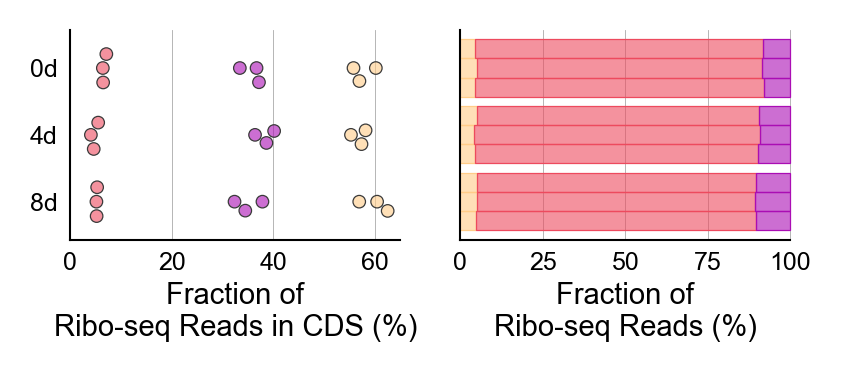

In [35]:
sF = 1 # Size factor
wgap = 0.2
hgap = 0.1
nrow, ncol = 1, 2

width_ratios = [1.1, 1.1]
height_ratios = [0.7]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


# Total genes
ax = fig.add_subplot(grid[0,0])

sns.swarmplot(data=all_plot_data, x="Pct", y="Day", hue="Frame",
              palette=['#FFCC8899','#ED4A5E99','#AA0DB499'], size=3,
              linewidth=0.3,
              legend=False)

ax.set_xlim(0,65)
ax.set_ylim(2+4/7, -4/7)
ax.set_xticks([0,20,40,60])
ax.tick_params(length=0, pad=3)
ax.grid(axis='x', lw=0.2, c='#AAAAAA')

ax.set_xlabel('Fraction of\nRibo-seq Reads in CDS (%)', labelpad=1.5)
ax.set_ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)   


# mtDNA genes
ax = fig.add_subplot(grid[0,1])

ax.barh(y= np.array([1,2,3, 4.5,5.5,6.5, 8,9,10]), 
        width = plot_data['5UTR'], 
        height=1, color='#FFCC8899',
        lw=0.3, edgecolor='#FFCC88', clip_on=False)

ax.barh(y= np.array([1,2,3, 4.5,5.5,6.5, 8,9,10]), 
        width = plot_data['CDS'], left=plot_data['5UTR'], 
        height=1, color='#ED4A5E99',
        lw=0.3, edgecolor='#ED4A5E', clip_on=False)

ax.barh(y= np.array([1,2,3, 4.5,5.5,6.5, 8,9,10]), 
        width = plot_data['3UTR'], left=[plot_data['5UTR'][i]+plot_data['CDS'][i] for i in range(9)], 
        height=1, color='#AA0DB499',
        lw=0.3, edgecolor='#AA0DB4', clip_on=False)

ax.set_xlim(0,100)
ax.set_ylim(11, 0)
ax.set_yticks([])
ax.tick_params(length=0, pad=3)
ax.grid(axis='x', lw=0.2, c='#AAAAAA', clip_on=False)

ax.set_xlabel('Fraction of\nRibo-seq Reads (%)', labelpad=1.5)
ax.set_ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False) 


plt.savefig('3ntP-swarm_CDS-UTR-bar.pdf', bbox_inches='tight')
plt.show()
plt.close()